## **TOPIC CLASSIFICATION**

In [ ]:
pip install --upgrade tensorflow


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 1.3 MB/s eta 0:00:00
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.15.0
    Uninstalling tensorflow-2.15.0:
      Successfully uninstalled tensorflow-2.15.0


In [ ]:
import numpy as np
import pandas as pd
from scipy.sparse import hstack
from sklearn.naive_bayes import GaussianNB
import spacy
from sklearn import metrics
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.base import BaseEstimator, ClassifierMixin
from tensorflow.keras.utils import to_categorical
import string
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from scipy.sparse import csr_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [ ]:
pd.set_option('display.width', None)
pd.set_option('display.max_columns', None)
file_path = 'Dataset.csv'
train_data = pd.read_csv(file_path)

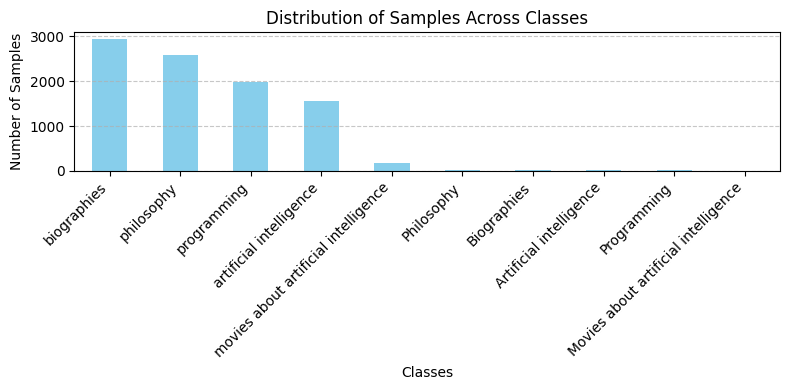

In [ ]:
class_distribution = train_data['category'].value_counts()
plt.figure(figsize=(8, 4))
class_distribution.plot(kind='bar', color='skyblue')
plt.title('Distribution of Samples Across Classes')
plt.xlabel('Classes')
plt.ylabel('Number of Samples')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

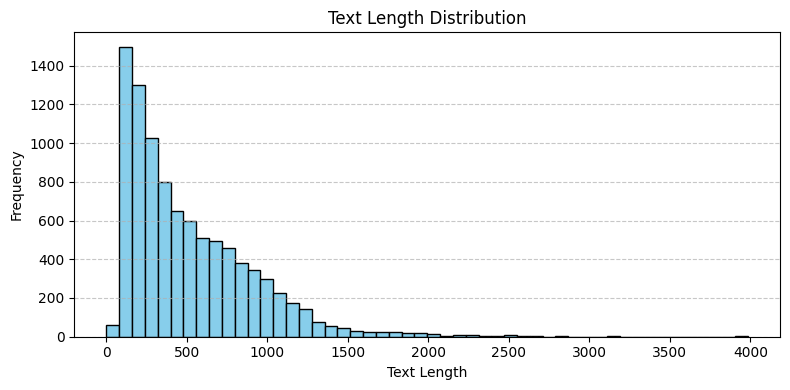

In [ ]:
text_lengths = train_data['paragraph'].apply(len)
plt.figure(figsize=(8, 4))
plt.hist(text_lengths, bins=50, color='skyblue', edgecolor='black')
plt.title('Text Length Distribution')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
train_data.replace("data missing", np.nan, inplace=True)

train_data.dropna(subset=['category'], inplace=True)

X = train_data.drop(columns=['category', 'par_id', 'lexicon_count', 'difficult_words', 'last_editor_gender', 'text_clarity'])
y = train_data['category']

# Define the dictionary containing duplicates
duplicate_mapping = {
    'artificial intelligence': 'Artificial intelligence',
    'biographies': 'Biographies',
    'movies about artificial intelligence': 'Movies about artificial intelligence',
    'philosophy': 'Philosophy',
    'programming': 'Programming'
}

# Replace duplicates in the target variable (y)
y.replace(duplicate_mapping, inplace=True)


print(y.unique())

['Biographies' 'Artificial intelligence' 'Programming' 'Philosophy'
 'Movies about artificial intelligence']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
encoder = OneHotEncoder(sparse=False)
y_train_reshaped = y_train.values.reshape(-1, 1)
y_test_reshaped = y_test.values.reshape(-1, 1)
y_train_encoded = encoder.fit_transform(y_train_reshaped)
y_test_encoded = encoder.transform(y_test_reshaped)
y_train_encoded = np.argmax(y_train_encoded, axis=1)
print(encoder.categories_)

print("Shape of y_train_encoded:", y_train_encoded.shape)
print("Shape of y_test_encoded:", y_test_encoded.shape)


[array(['Artificial intelligence', 'Biographies',
       'Movies about artificial intelligence', 'Philosophy',
       'Programming'], dtype=object)]
Shape of y_train_encoded: (7428,)
Shape of y_test_encoded: (1858, 5)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
imputer = SimpleImputer(strategy='most_frequent')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)
X_train_imputed = pd.DataFrame(X_train_imputed, columns=X_train.columns)
X_test_imputed = pd.DataFrame(X_test_imputed, columns=X_train.columns)

In [ ]:
print(X_train_imputed.columns)


Index(['paragraph', 'has_entity'], dtype='object')


In [ ]:
encoder = OneHotEncoder(sparse=False, drop='first')

X_train_has_entity = X_train_imputed['has_entity'].values.reshape(-1, 1)
X_test_has_entity = X_test_imputed['has_entity'].values.reshape(-1, 1)

X_train_encoded = encoder.fit_transform(X_train_has_entity)
X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=encoder.get_feature_names_out(['has_entity']))

X_test_encoded = encoder.transform(X_test_has_entity)
X_test_encoded_df = pd.DataFrame(X_test_encoded, columns=encoder.get_feature_names_out(['has_entity']))

X_train_final = pd.concat([X_train_imputed.reset_index(drop=True), X_train_encoded_df], axis=1)
X_test_final = pd.concat([X_test_imputed.reset_index(drop=True), X_test_encoded_df], axis=1)

print(X_train_final.head(10))


                                           paragraph                      has_entity  \
0  In this context, the term script refers to a s...    ORG_NO_PRODUCT_NO_PERSON_NO_   
1  UCBLogo, also known as Berkeley Logo, is a fre...  ORG_YES_PRODUCT_NO_PERSON_YES_   
2  Propositions are also spoken of as the content...    ORG_NO_PRODUCT_NO_PERSON_NO_   
3  Given the status of human sexual dimorphism as...    ORG_NO_PRODUCT_NO_PERSON_NO_   
4   where 0 ≤ m < n, the algorithm tries to divid...   ORG_YES_PRODUCT_NO_PERSON_NO_   
5  A machine with artificial general intelligence...    ORG_NO_PRODUCT_NO_PERSON_NO_   
6  Assembly language also allows programmers to w...   ORG_YES_PRODUCT_NO_PERSON_NO_   
7  Stephen William Hawking  was an English theore...  ORG_YES_PRODUCT_NO_PERSON_YES_   
8  Charles S. Peirce of the late-modern American ...   ORG_NO_PRODUCT_NO_PERSON_YES_   
9  The lithographs were hand coloured. In the int...   ORG_NO_PRODUCT_NO_PERSON_YES_   

   has_entity_ORG_NO_PRODUCT_NO

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
print(X_train_final.shape)

(7428, 9)


In [ ]:
nlp = spacy.load('en_core_web_sm')
def tokenize_text(text):
    doc = nlp(text)
    tokens = [token.text for token in doc]
    return tokens
X_train_final['tokenized']=X_train_final['paragraph'].apply(tokenize_text)
X_test_final['tokenized']=X_test_final['paragraph'].apply(tokenize_text)

print(X_train_final.head(10))
print(X_test_final.head(10))

                                           paragraph                      has_entity  \
0  In this context, the term script refers to a s...    ORG_NO_PRODUCT_NO_PERSON_NO_   
1  UCBLogo, also known as Berkeley Logo, is a fre...  ORG_YES_PRODUCT_NO_PERSON_YES_   
2  Propositions are also spoken of as the content...    ORG_NO_PRODUCT_NO_PERSON_NO_   
3  Given the status of human sexual dimorphism as...    ORG_NO_PRODUCT_NO_PERSON_NO_   
4   where 0 ≤ m < n, the algorithm tries to divid...   ORG_YES_PRODUCT_NO_PERSON_NO_   
5  A machine with artificial general intelligence...    ORG_NO_PRODUCT_NO_PERSON_NO_   
6  Assembly language also allows programmers to w...   ORG_YES_PRODUCT_NO_PERSON_NO_   
7  Stephen William Hawking  was an English theore...  ORG_YES_PRODUCT_NO_PERSON_YES_   
8  Charles S. Peirce of the late-modern American ...   ORG_NO_PRODUCT_NO_PERSON_YES_   
9  The lithographs were hand coloured. In the int...   ORG_NO_PRODUCT_NO_PERSON_YES_   

   has_entity_ORG_NO_PRODUCT_NO

In [ ]:
X_train_final['tokenized'] = X_train_final['tokenized'].apply(lambda tokens: [token.lower() for token in tokens])
X_test_final['tokenized'] = X_test_final['tokenized'].apply(lambda tokens: [token.lower() for token in tokens])
print(X_train_final['tokenized'].head(10))
print(X_test_final['tokenized'].head(10))

0    [in, this, context, ,, the, term, script, refe...
1    [ucblogo, ,, also, known, as, berkeley, logo, ...
2    [propositions, are, also, spoken, of, as, the,...
3    [given, the, status, of, human, sexual, dimorp...
4    [ , where, 0, ≤, m, <, n, ,, the, algorithm, t...
5    [a, machine, with, artificial, general, intell...
6    [assembly, language, also, allows, programmers...
7    [stephen, william, hawking,  , was, an, englis...
8    [charles, s., peirce, of, the, late, -, modern...
9    [the, lithographs, were, hand, coloured, ., in...
Name: tokenized, dtype: object
0    [the, factorial, function, may, then, be, writ...
1    [the, study, of, good, and, evil, in, philosop...
2    [in, the, early, 1980s, ,, there, were, some, ...
3    [banting, developed, an, interest, in, paintin...
4    [ , haldane, ,, ronald, fisher, and, sewall, w...
5    [dylan, was, in, its, first, version, a, mix, ...
6    [cascading, style, sheets, ,, or, css, ,, is, ...
7    [inspired, by, piaget, ,, law

In [ ]:

def remove_stop_words(tokens):
    doc = nlp(" ".join(tokens))
    filtered_tokens = [token.text for token in doc if not token.is_stop]
    return filtered_tokens
X_train_final['tokenized'] = X_train_final['tokenized'].apply(remove_stop_words)
X_test_final['tokenized'] = X_test_final['tokenized'].apply(remove_stop_words)

In [ ]:
print(X_train_final['tokenized'].head(10))
print(X_test_final['tokenized'].head(10))

0    [context, ,, term, script, refers, small, prog...
1    [ucblogo, ,, known, berkeley, logo, ,, free, ,...
2    [propositions, spoken, content, beliefs, simil...
3    [given, status, human, sexual, dimorphism, anc...
4    [  , 0, ≤, m, <, n, ,, algorithm, tries, divid...
5    [machine, artificial, general, intelligence, a...
6    [assembly, language, allows, programmers, writ...
7    [stephen, william, hawking,   , english, theor...
8    [charles, s., peirce, late, -, modern, america...
9    [lithographs, hand, coloured, ., introduction,...
Name: tokenized, dtype: object
0    [factorial, function, written, arbitrary, -, p...
1    [study, good, evil, philosophy, called, ethics...
2    [early, 1980s, ,, developments, prompted, inri...
3    [banting, developed, interest, painting, begin...
4    [  , haldane, ,, ronald, fisher, sewall, wrigh...
5    [dylan, version, mix, scheme, common, lisp, ob...
6    [cascading, style, sheets, ,, css, ,, way, cha...
7    [inspired, piaget, ,, lawrenc

In [ ]:
def remove_punctuation(tokens):
    doc = nlp(" ".join(tokens))
    filtered_tokens = [token.text for token in doc if token.text not in string.punctuation]
    return filtered_tokens
X_train_final['tokenized'] = X_train_final['tokenized'].apply(remove_punctuation)
X_test_final['tokenized'] = X_test_final['tokenized'].apply(remove_punctuation)

In [ ]:
print(X_train_final['tokenized'].head(10))
print(X_test_final['tokenized'].head(10))

0    [context, term, script, refers, small, program...
1    [ucblogo, known, berkeley, logo, free, cross, ...
2    [propositions, spoken, content, beliefs, simil...
3    [given, status, human, sexual, dimorphism, anc...
4    [   , 0, ≤, m, n, algorithm, tries, divide, n+...
5    [machine, artificial, general, intelligence, a...
6    [assembly, language, allows, programmers, writ...
7    [stephen, william, hawking,    , english, theo...
8    [charles, s., peirce, late, modern, american, ...
9    [lithographs, hand, coloured, introduction, wo...
Name: tokenized, dtype: object
0    [factorial, function, written, arbitrary, prec...
1    [study, good, evil, philosophy, called, ethics...
2    [early, 1980s, developments, prompted, inria, ...
3    [banting, developed, interest, painting, begin...
4    [   , haldane, ronald, fisher, sewall, wright,...
5    [dylan, version, mix, scheme, common, lisp, ob...
6    [cascading, style, sheets, css, way, change, l...
7    [inspired, piaget, lawrence, 

In [ ]:
def lemmatize_text(tokens):
    doc = nlp(" ".join(tokens))  # Join tokens into a string and process with spaCy
    lemmatized_tokens = [token.lemma_ for token in doc]
    return lemmatized_tokens
X_train_final['tokenized'] = X_train_final['tokenized'].apply(lemmatize_text)
X_test_final['tokenized'] = X_test_final['tokenized'].apply(lemmatize_text)
print(X_train_final['tokenized'].head(10))
print(X_test_final['tokenized'].head(10))

0    [context, term, script, refer, small, program,...
1    [ucblogo, know, berkeley, logo, free, cross, p...
2    [proposition, speak, content, belief, similar,...
3    [give, status, human, sexual, dimorphism, anci...
4    [    , 0, ≤, m, n, algorithm, try, divide, n+1...
5    [machine, artificial, general, intelligence, a...
6    [assembly, language, allow, programmer, write,...
7    [stephen, william, hawk,     , english, theore...
8    [charles, s., peirce, late, modern, american, ...
9    [lithographs, hand, colour, introduction, work...
Name: tokenized, dtype: object
0    [factorial, function, write, arbitrary, precis...
1    [study, good, evil, philosophy, call, ethic, e...
2    [early, 1980, development, prompt, inria, form...
3    [bante, develop, interest, painting, begin, 19...
4    [    , haldane, ronald, fisher, sewall, wright...
5    [dylan, version, mix, scheme, common, lisp, ob...
6    [cascade, style, sheet, css, way, change, look...
7    [inspire, piaget, lawrence, k

In [ ]:
print(X_train_final.head(10))

                                           paragraph                      has_entity  \
0  In this context, the term script refers to a s...    ORG_NO_PRODUCT_NO_PERSON_NO_   
1  UCBLogo, also known as Berkeley Logo, is a fre...  ORG_YES_PRODUCT_NO_PERSON_YES_   
2  Propositions are also spoken of as the content...    ORG_NO_PRODUCT_NO_PERSON_NO_   
3  Given the status of human sexual dimorphism as...    ORG_NO_PRODUCT_NO_PERSON_NO_   
4   where 0 ≤ m < n, the algorithm tries to divid...   ORG_YES_PRODUCT_NO_PERSON_NO_   
5  A machine with artificial general intelligence...    ORG_NO_PRODUCT_NO_PERSON_NO_   
6  Assembly language also allows programmers to w...   ORG_YES_PRODUCT_NO_PERSON_NO_   
7  Stephen William Hawking  was an English theore...  ORG_YES_PRODUCT_NO_PERSON_YES_   
8  Charles S. Peirce of the late-modern American ...   ORG_NO_PRODUCT_NO_PERSON_YES_   
9  The lithographs were hand coloured. In the int...   ORG_NO_PRODUCT_NO_PERSON_YES_   

   has_entity_ORG_NO_PRODUCT_NO

In [ ]:

print(X_train_final.head(10))

                                           paragraph                      has_entity  \
0  In this context, the term script refers to a s...    ORG_NO_PRODUCT_NO_PERSON_NO_   
1  UCBLogo, also known as Berkeley Logo, is a fre...  ORG_YES_PRODUCT_NO_PERSON_YES_   
2  Propositions are also spoken of as the content...    ORG_NO_PRODUCT_NO_PERSON_NO_   
3  Given the status of human sexual dimorphism as...    ORG_NO_PRODUCT_NO_PERSON_NO_   
4   where 0 ≤ m < n, the algorithm tries to divid...   ORG_YES_PRODUCT_NO_PERSON_NO_   
5  A machine with artificial general intelligence...    ORG_NO_PRODUCT_NO_PERSON_NO_   
6  Assembly language also allows programmers to w...   ORG_YES_PRODUCT_NO_PERSON_NO_   
7  Stephen William Hawking  was an English theore...  ORG_YES_PRODUCT_NO_PERSON_YES_   
8  Charles S. Peirce of the late-modern American ...   ORG_NO_PRODUCT_NO_PERSON_YES_   
9  The lithographs were hand coloured. In the int...   ORG_NO_PRODUCT_NO_PERSON_YES_   

   has_entity_ORG_NO_PRODUCT_NO

In [ ]:
vectorizer = TfidfVectorizer()
X_train_final['joined_tokens'] = X_train_final['tokenized'].apply(' '.join)

X_train_tokenized = vectorizer.fit_transform(X_train_final['joined_tokens'])
encoder = OneHotEncoder(handle_unknown='ignore')

X_train_encoded = encoder.fit_transform(X_train_final.drop('tokenized', axis=1))
X_train_vectorized = hstack([X_train_encoded, X_train_tokenized])
naive_bayes = MultinomialNB(alpha=0.1)

naive_bayes.fit(X_train_vectorized, y_train_encoded.ravel())

X_test_final['joined_tokens'] = X_test_final['tokenized'].apply(' '.join)
X_test_tokenized = vectorizer.transform(X_test_final['joined_tokens'])
X_test_encoded = encoder.transform(X_test_final.drop('tokenized', axis=1))
X_test_vectorized = hstack([X_test_encoded, X_test_tokenized])

y_pred = naive_bayes.predict(X_test_vectorized)


In [ ]:
print(y_test_encoded.shape)
print(y_pred.shape)
print(y_test_encoded[:5])
print(y_pred[:5])

(1858, 5)
(1858,)
[[0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]]
[4 3 4 1 1]


In [ ]:
y_test_labels = np.argmax(y_test_encoded, axis=1)

accuracy = metrics.accuracy_score(y_test_labels, y_pred)
print(f'Accuracy: {accuracy}')

precision = metrics.precision_score(y_test_labels, y_pred, average='weighted')
recall = metrics.recall_score(y_test_labels, y_pred, average='weighted')
f1_score = metrics.f1_score(y_test_labels, y_pred, average='weighted')

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1_score}')

Accuracy: 0.9305705059203444
Precision: 0.9319077799134917
Recall: 0.9305705059203444
F1 Score: 0.92913466912662


In [ ]:
y_train_pred = naive_bayes.predict(X_train_vectorized)

accuracy_train = metrics.accuracy_score(y_train_encoded, y_train_pred)
print(f'Training Accuracy: {accuracy_train}')

precision_train = metrics.precision_score(y_train_encoded, y_train_pred, average='weighted')
recall_train = metrics.recall_score(y_train_encoded, y_train_pred, average='weighted')
f1_score_train = metrics.f1_score(y_train_encoded, y_train_pred, average='weighted')

print(f'Training Precision: {precision_train}')
print(f'Training Recall: {recall_train}')
print(f'Training F1 Score: {f1_score_train}')


Training Accuracy: 0.9946149703823371
Training Precision: 0.9946307777042547
Training Recall: 0.9946149703823371
Training F1 Score: 0.9946112196158675


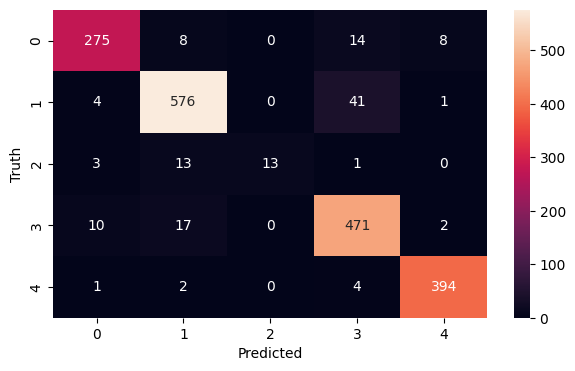

[[275   8   0  14   8]
 [  4 576   0  41   1]
 [  3  13  13   1   0]
 [ 10  17   0 471   2]
 [  1   2   0   4 394]]


In [ ]:
cm = confusion_matrix(y_test_labels, y_pred)
plt.figure(figsize=(7,4))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()
print(cm)

In [ ]:
report = classification_report(y_test_labels, y_pred)

print('Classification Report:')
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.90      0.92       305
           1       0.94      0.93      0.93       622
           2       1.00      0.43      0.60        30
           3       0.89      0.94      0.91       500
           4       0.97      0.98      0.98       401

    accuracy                           0.93      1858
   macro avg       0.95      0.84      0.87      1858
weighted avg       0.93      0.93      0.93      1858



In [ ]:
accuracy = accuracy_score(y_test_labels, y_pred)
print('Accuracy Score:')
print(accuracy)

Accuracy Score:
0.9305705059203444


In [ ]:
class_proportions = np.bincount(y_test_labels) / len(y_test_labels)
majority_class = np.argmax(class_proportions)


baseline_accuracy = accuracy_score(y_test_labels, baseline_pred)

print('Baseline Accuracy:', baseline_accuracy)

Baseline Accuracy: 0.33476856835306784


## **TEXT_CLARITY CLASSIFICATION.**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.impute import SimpleImputer
import spacy
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from scipy.sparse import hstack
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

In [ ]:
pd.set_option('display.width', None)
pd.set_option('display.max_columns', None)
file_path = 'Dataset.csv'
df = pd.read_csv(file_path, nrows=100,
                 usecols=['par_id', 'paragraph', 'has_entity', 'lexicon_count',
                          'difficult_words', 'last_editor_gender', 'category',
                          'text_clarity'])

In [ ]:
columns_to_drop = ['par_id', 'category']
df.replace("data missing", np.nan, inplace=True)
df = df.drop(columns=columns_to_drop)
X = df.drop(columns=['text_clarity'])
y = df['text_clarity']
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)


Shape of X: (100, 5)
Shape of y: (100,)


In [ ]:
X['character_count'] = X['paragraph'].apply(len)
X['average_word_length'] = X['paragraph'].apply(lambda x: sum(len(word) for word in x.split()) / len(x.split()))
print(X.head())

                                           paragraph                       has_entity  \
0  Ramsay was born in Glasgow on 2 October 1852. ...   ORG_YES_PRODUCT_NO_PERSON_YES_   
1  It has been widely estimated for at least the ...    ORG_YES_PRODUCT_NO_PERSON_NO_   
2  He went on to win the Royal Medal of the Royal...    ORG_YES_PRODUCT_NO_PERSON_NO_   
3  The changes have altered many underlying assum...    ORG_NO_PRODUCT_YES_PERSON_NO_   
4  After these novels were published, Disraeli de...  ORG_YES_PRODUCT_YES_PERSON_YES_   

   lexicon_count  difficult_words last_editor_gender  character_count  average_word_length  
0             49             12.0                man              284             4.795918  
1            166             47.0                man             1039             5.253012  
2             69             18.0         non-binary              425             5.144928  
3             76             27.0         non-binary              514             5.776316  


In [ ]:
nlp = spacy.load("en_core_web_sm")
def get_pos_counts(text):
    doc = nlp(text)
    pos_counts = {}
    for token in doc:
        pos = token.pos_
        pos_counts[pos] = pos_counts.get(pos, 0) + 1
    return pos_counts
X['pos_counts'] = X['paragraph'].apply(get_pos_counts)
print(X.head())



                                           paragraph                       has_entity  \
0  Ramsay was born in Glasgow on 2 October 1852. ...   ORG_YES_PRODUCT_NO_PERSON_YES_   
1  It has been widely estimated for at least the ...    ORG_YES_PRODUCT_NO_PERSON_NO_   
2  He went on to win the Royal Medal of the Royal...    ORG_YES_PRODUCT_NO_PERSON_NO_   
3  The changes have altered many underlying assum...    ORG_NO_PRODUCT_YES_PERSON_NO_   
4  After these novels were published, Disraeli de...  ORG_YES_PRODUCT_YES_PERSON_YES_   

   lexicon_count  difficult_words last_editor_gender  character_count  average_word_length  \
0             49             12.0                man              284             4.795918   
1            166             47.0                man             1039             5.253012   
2             69             18.0         non-binary              425             5.144928   
3             76             27.0         non-binary              514             5.77631

In [ ]:
nan_values = X.isna().sum()
print("NaN values in the dataset:")
print(nan_values)

NaN values in the dataset:
paragraph              0
has_entity             0
lexicon_count          0
difficult_words        1
last_editor_gender     0
character_count        0
average_word_length    0
pos_counts             0
dtype: int64


In [ ]:
imputer = SimpleImputer(strategy='mean')
X['difficult_words'] = imputer.fit_transform(X[['difficult_words']])
nan_values_after_imputation = X.isna().sum()
print("NaN values in the dataset after imputation:")
print(nan_values_after_imputation)

NaN values in the dataset after imputation:
paragraph              0
has_entity             0
lexicon_count          0
difficult_words        0
last_editor_gender     0
character_count        0
average_word_length    0
pos_counts             0
dtype: int64


In [ ]:
nan_values = y.isna().sum()
print("NaN values in the dataset:")
print(nan_values)

NaN values in the dataset:
0


In [ ]:
unique_keys = set()
X['pos_counts'].apply(lambda x: unique_keys.update(x.keys()))
print(unique_keys)

{'ADV', 'PUNCT', 'PRON', 'CCONJ', 'PROPN', 'ADP', 'SYM', 'DET', 'NUM', 'ADJ', 'VERB', 'SCONJ', 'SPACE', 'X', 'AUX', 'PART', 'NOUN'}


In [ ]:
vec = DictVectorizer()
dict_list = X['pos_counts'].tolist()
data = vec.fit_transform(dict_list).toarray()
feature_names = vec.get_feature_names_out()
df_encoded = pd.DataFrame(data, columns=feature_names)
X = pd.concat([X, df_encoded], axis=1)
print(df_encoded.head())

    ADJ   ADP  ADV   AUX  CCONJ   DET  NOUN  NUM  PART  PRON  PROPN  PUNCT  SCONJ  SPACE  SYM  \
0   2.0   9.0  0.0   4.0    1.0   4.0   4.0  2.0   0.0   4.0   18.0    9.0    0.0    0.0  0.0   
1  19.0  30.0  4.0   2.0    2.0  22.0  37.0  4.0   9.0   2.0   21.0   15.0    1.0    2.0  0.0   
2   1.0  14.0  0.0   2.0    2.0   8.0   5.0  5.0   2.0   2.0   22.0    5.0    0.0    2.0  0.0   
3   9.0   7.0  5.0   4.0    4.0   7.0  21.0  1.0   4.0   1.0    2.0   14.0    1.0    0.0  0.0   
4  18.0  31.0  4.0  13.0    9.0  21.0  29.0  2.0   6.0  16.0   29.0   27.0    3.0    0.0  0.0   

   VERB    X  
0   2.0  0.0  
1  20.0  0.0  
2   7.0  0.0  
3   9.0  0.0  
4  25.0  0.0  


In [ ]:
print(X.head())

                                           paragraph                       has_entity  \
0  Ramsay was born in Glasgow on 2 October 1852. ...   ORG_YES_PRODUCT_NO_PERSON_YES_   
1  It has been widely estimated for at least the ...    ORG_YES_PRODUCT_NO_PERSON_NO_   
2  He went on to win the Royal Medal of the Royal...    ORG_YES_PRODUCT_NO_PERSON_NO_   
3  The changes have altered many underlying assum...    ORG_NO_PRODUCT_YES_PERSON_NO_   
4  After these novels were published, Disraeli de...  ORG_YES_PRODUCT_YES_PERSON_YES_   

   lexicon_count  difficult_words last_editor_gender  character_count  average_word_length  \
0             49             12.0                man              284             4.795918   
1            166             47.0                man             1039             5.253012   
2             69             18.0         non-binary              425             5.144928   
3             76             27.0         non-binary              514             5.77631

In [ ]:
cat_cols = ['last_editor_gender', 'has_entity']
X_cat = X[cat_cols]
X_num = X.drop(columns=cat_cols)
ohe = OneHotEncoder(drop='first', sparse=False)
cat_encoded = ohe.fit_transform(X_cat)
feature_names = ohe.get_feature_names_out(cat_cols)
df_cat_encoded = pd.DataFrame(cat_encoded, columns=feature_names)
X = pd.concat([X_num, df_cat_encoded], axis=1)
print(X.head())


                                           paragraph  lexicon_count  difficult_words  \
0  Ramsay was born in Glasgow on 2 October 1852. ...             49             12.0   
1  It has been widely estimated for at least the ...            166             47.0   
2  He went on to win the Royal Medal of the Royal...             69             18.0   
3  The changes have altered many underlying assum...             76             27.0   
4  After these novels were published, Disraeli de...            200             47.0   

   character_count  average_word_length                                         pos_counts   ADJ  \
0              284             4.795918  {'PROPN': 18, 'AUX': 4, 'VERB': 2, 'ADP': 9, '...   2.0   
1             1039             5.253012  {'PRON': 2, 'AUX': 2, 'ADV': 4, 'VERB': 20, 'A...  19.0   
2              425             5.144928  {'PRON': 2, 'VERB': 7, 'ADP': 14, 'PART': 2, '...   1.0   
3              514             5.776316  {'DET': 7, 'NOUN': 21, 'AUX': 

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
def tokenize_text(text):
    doc = nlp(text)
    tokens = [token.text for token in doc]
    return tokens
X['tokenized']=X['paragraph'].apply(tokenize_text)
print(X.head(10))


                                           paragraph  lexicon_count  difficult_words  \
0  Ramsay was born in Glasgow on 2 October 1852. ...             49             12.0   
1  It has been widely estimated for at least the ...            166             47.0   
2  He went on to win the Royal Medal of the Royal...             69             18.0   
3  The changes have altered many underlying assum...             76             27.0   
4  After these novels were published, Disraeli de...            200             47.0   
5  Philo also proposes that the order in nature m...            137             36.0   
6   This led to the AI spring of the early 2020s,...            116             47.0   
7  A second form of functionalism is based on the...             42             14.0   
8  The opposite of "moral" is "immoral", meaning ...             51              8.0   
9  Pepys' diary provides a first-hand account of ...            139             31.0   

   character_count  average_wor

In [ ]:
def remove_stop_words(tokens):
    doc = nlp(" ".join(tokens))  # Join tokens into a string and process with spaCy
    filtered_tokens = [token.text for token in doc if not token.is_stop]
    return filtered_tokens
X['tokenized'] = X['tokenized'].apply(remove_stop_words)

In [ ]:
def remove_punctuation(tokens):
    doc = nlp(" ".join(tokens))
    filtered_tokens = [token.text for token in doc if token.text not in string.punctuation]
    return filtered_tokens
X['tokenized'] = X['tokenized'].apply(remove_punctuation)


In [ ]:
def lemmatize_text(tokens):
    doc = nlp(" ".join(tokens))
    lemmatized_tokens = [token.lemma_ for token in doc]
    return lemmatized_tokens
X['tokenized'] = X['tokenized'].apply(lemmatize_text)

In [ ]:
lb = LabelBinarizer()
y = lb.fit_transform(y)
print(y)


[[0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (80, 33)
X_test shape: (20, 33)
y_train shape: (80, 1)
y_test shape: (20, 1)


In [ ]:
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train['paragraph'])
X_test_tfidf = vectorizer.transform(X_test['paragraph'])
X_train_tfidf = vectorizer.fit_transform(X_train['paragraph'])
X_test_tfidf = vectorizer.transform(X_test['paragraph'])




In [ ]:
X_train_numeric = X_train.select_dtypes(include=[np.number]).to_numpy()
X_test_numeric = X_test.select_dtypes(include=[np.number]).to_numpy()
X_train_full = hstack([X_train_tfidf, X_train_numeric])
X_test_full = hstack([X_test_tfidf, X_test_numeric])

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

param_distributions = {
    'n_estimators': randint(50, 200),
    'learning_rate': uniform(0.01, 0.2),
    'max_depth': randint(3, 10),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 10),
    'max_features': ['auto', 'sqrt', 'log2', None]
}


gb_clf = GradientBoostingClassifier(random_state=42)

random_search = RandomizedSearchCV(
    gb_clf,
    param_distributions=param_distributions,
    n_iter=100,
    cv=5,
    random_state=42,
    verbose=1
)


random_search.fit(X_train_full, y_train)

best_params = random_search.best_params_




In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score


gb_clf_best = GradientBoostingClassifier(
    learning_rate=0.6216583496608181,
    max_depth=5,
    max_features=None,
    min_samples_leaf=0.5,
    min_samples_split=10,
    n_estimators=60,
    random_state=42
)


gb_clf_best.fit(X_train_full, y_train)


y_train_pred = gb_clf_best.predict(X_train_full)


train_accuracy = accuracy_score(y_train, y_train_pred)


y_test_pred = gb_clf_best.predict(X_test_full)

test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")


Training Accuracy: 0.74
Test Accuracy: 0.75


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
from sklearn.metrics import confusion_matrix

train_confusion_matrix = confusion_matrix(y_train, y_train_pred)
test_confusion_matrix = confusion_matrix(y_test, y_test_pred)

print(f"Training Confusion Matrix:\n{train_confusion_matrix}")
print(f"Test Confusion Matrix:\n{test_confusion_matrix}")


Training Confusion Matrix:
[[39  8]
 [13 20]]
Test Confusion Matrix:
[[8 2]
 [3 7]]


In [ ]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy='most_frequent')
dummy_clf.fit(X_train_full, y_train)

y_test_pred_dummy = dummy_clf.predict(X_test_full)
test_accuracy_dummy = accuracy_score(y_test, y_test_pred_dummy)

print(f"Baseline Accuracy: {test_accuracy_dummy:.2f}")


Baseline Accuracy: 0.50


In [ ]:
from sklearn.metrics import classification_report

train_classification_report = classification_report(y_train, y_train_pred)
test_classification_report = classification_report(y_test, y_test_pred)

print(f"Training Classification Report:\n{train_classification_report}")
print(f"Test Classification Report:\n{test_classification_report}")


Training Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.83      0.79        47
           1       0.71      0.61      0.66        33

    accuracy                           0.74        80
   macro avg       0.73      0.72      0.72        80
weighted avg       0.74      0.74      0.73        80

Test Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.80      0.76        10
           1       0.78      0.70      0.74        10

    accuracy                           0.75        20
   macro avg       0.75      0.75      0.75        20
weighted avg       0.75      0.75      0.75        20



In [ ]:
from sklearn.metrics import f1_score

train_f1_score = f1_score(y_train, y_train_pred, average='weighted')
test_f1_score = f1_score(y_test, y_test_pred, average='weighted')

print(f"Training F1 Score: {train_f1_score:.2f}")
print(f"Test F1 Score: {test_f1_score:.2f}")


Training F1 Score: 0.73
Test F1 Score: 0.75
